In [1]:
import torchvision.transforms as transforms
import torchvision.models as models
import cv2 as cv2
from torch_dct import dct, idct
import torch
import torch.nn.functional as F
import torch.nn as nn
import os
from torchattacks import FGSM, CW, PGD
os.environ["CUDA_VISIBLE_DEVICES"] = "3"
from utils import *

torch.Size([3, 1080, 1080])


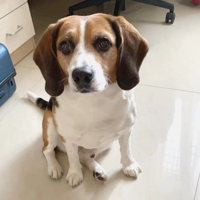

In [2]:
fn = 'imgs/beagle.jpg'
img_tensor = read_img(fn)
show_tensor(img_tensor)

In [3]:
rn50 = models.resnet50(weights="IMAGENET1K_V1")
model = combine_model(rn50, [224,224])
model = model.eval().cuda()

In [4]:
print(predict_1_img(img_tensor,model))

(162, 0.9002524614334106)


In [5]:
adv_img = attack_1_img(model,img_tensor,162, 'PGD', eps=8/255, alpha=1/255, steps=10, random_start=True)
# adv_img = attack_1_img(model,img_tensor,162, 'CW', c=1, kappa=0, steps=50, lr=0.01)

In [6]:
print(predict_1_img(adv_img,model))

(246, 1.0)


torch.Size([3, 1080, 1080])


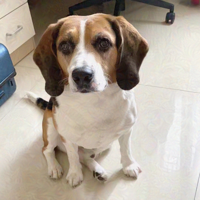

In [7]:
show_tensor(adv_img)

In [8]:
incv3 = models.inception_v3(weights='IMAGENET1K_V1')
model2 = combine_model(incv3, [299,299])
model2 = model2.eval().cuda()

In [9]:
predict_1_img(adv_img,model2)

(162, 0.5169070959091187)

In [10]:
def low_mask(input,n):
    res = torch.zeros_like(input)
    res[:,:n,:n] = input[:,:n,:n]
    return res

In [11]:
per = adv_img - img_tensor

torch.Size([3, 1080, 1080])


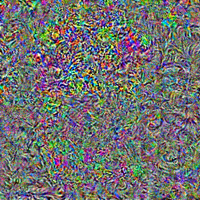

In [12]:
show_tensor(per)

In [13]:
low_feq_per = idct(low_mask(dct(per),512))

torch.Size([3, 1080, 1080])


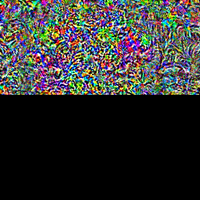

In [14]:
show_tensor(low_feq_per)

In [15]:
predict_1_img(img_tensor+low_feq_per,model)

(246, 0.9999076128005981)

In [16]:
predict_1_img(img_tensor+low_feq_per,model2)

(162, 0.7253314256668091)

In [17]:
predict_1_img(adv_img,model2)

(162, 0.5169070959091187)

In [18]:
print('https://github.com/cleverhans-lab/cleverhans/tree / master / cleverhans _ v3 . 1 . 0 / examples / nips17 _ adversarial_competition/dataset'.replace(' ',''))

https://github.com/cleverhans-lab/cleverhans/tree/master/cleverhans_v3.1.0/examples/nips17_adversarial_competition/dataset
